#Milestone 1
Theo Jonathan

FTDS Batch 020

##Objective

Mampu memahami konsep Supervised Learning.

Mampu mempersiapkan data untuk digunakan dalam model Supervised Learning.

Mampu mengimplementasikan Supervised Learning dengan data yang diberikan.

Mampu melakukan Hyperparameter Tuning dan Model Improvement.

##Problem Statement
Saya seorang data analisis yang bekerja di perusahaan perbankan. Saya diminta untuk menganalisa dataset untuk memprediksi jumlah tagihan kartu kredit bulan berikutnya dari tiap nasabah berdasarkan data yang ada. Dengan itu saya akan melakukan beberapa analisa sebagai berikut untuk mendapatkan data yang saya butuhkan untuk membuat model prediksi yang tepat :

Melihat apakah ada data duplikat

Memeriksa missing values

Mencari outliers

Memeriksa distribusi data

Membuat rekayasa fitur untuk membuat model

Membuat beberapa model yang akan digunakan dan kemudian dibandingkan

Memilih model terbaik untuk dijadikan model utama

##Penjelasan Dataset
Dataset merupakan kumpulan data nasabah berdasarkan umur, jenis kelamin, status pernikahan, tingkat pendidikan, limit kartu kredit, pembayaran, nominal tagihan, pembayaran yang dilakukan, dan pembayaran bulan depan.

##Query SQL
SELECT limit_balance, CAST(sex AS INT64) AS Sex, CAST(education_level AS INT64) AS Education_Level, CAST(marital_status AS INT64) AS Marital_Status, age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS FLOAT64) AS Pay_5, CAST(pay_6 AS FLOAT64) AS Pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, CAST(default_payment_next_month AS INT64) AS Default_Payment_Next_Month

FROM bigquery-public-data.ml_datasets.credit_card_default LIMIT 39820

(LIMIT 37829 dari batch 20 x tahun lahir 1991, 19x1991=39820)

##Conceptual Problem

1. Criterion adalah sebuah fungsi untuk menilai kualitas dari data split. Dalam model ini, terdapat criterion entropy karena adanaya ketidakpastian dalam dataset mempunyai yang cukup besar sehingga tidak bisa memprediksi dengan baik..

2. Pruning pada Tree-Based model adalah sebuah proses untuk membuang komponen pada klasifikasi agar bisa mempercepat inference model dan mengurangi size penyimpanan model. Proses pruning dibagi menjadi dua yaitu pre-pruning dan post-pruning

3. Untuk memilih K yang optimal pada KNN adalah dengan cara menggunakan error plot atau accuracy plot dari model yang sudah dibuat.

4. Cross Validation adalah sebuah teknik untuk mengevaluasi sebuah model dengan tujuan untuk memilih model yang terbaik agar bisa membuat prediksi dan mencegah adanya overfitting.

5. Accuracy, Precision, Recall, dan F1 Score merupakan bagian dari Confusion Matrix untuk menilai akurasi dari sebuah klasifikasi. Yang dimaksud dengan metrics-metrics tersebut dan kapan digunakan :

Accuracy : Metrics yang melihat seberapa akurat sebuah model dapat mengklasifikasikan dengan benar. Digunakan ketika distribusi kelas dalam dataset seimbang.

Precission : Metrics untuk melihat keakuratan antara data dengan hasil prediksi yang dibuat oleh model. Digunakan ketika ingin melihat seberapa baik model memprediksi value positif.

Recall : Menunjukan keberhasilan sebuah model dalam menemukan kembali sebuah informasi. Digunakan ketika ingin mengetahui seberapa baik model dapat mendeteksi instance positif.

F1 Score : Menunjukan rata-rata harmonis (harmonic mean) dari Precission dan Recall. Digunakan ketika ingin mendapatkan performa yang seimbang antara Precission dan Recall.

##Import Libraries


In [87]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, auc, RocCurveDisplay, roc_curve


import joblib
import json

import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.__version__

'1.2.2'

##Data Loading

In [2]:
#Loading dataset
df = pd.read_csv ('/content/h8dsft_P1M1_theo-jonathan.csv')
df

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [3]:
df.shape

(2965, 24)

Data terdiri dari 2965 baris dan 24 kolom.

In [4]:
#Menampilkan 10 data awal dari dataset
df.head(10)

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [5]:
#Menampilkan 10 data terakhir dari dataset
df.tail(10)

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [6]:
#Melihat isi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   Sex                         2965 non-null   int64  
 2   Education_Level             2965 non-null   int64  
 3   Marital_Status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   Pay_5                       2965 non-null   float64
 10  Pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Semua data merupakan data numerical, tidak ada yang berupa data categorical.

In [7]:
df.describe()

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


##Exploratory Data Analysis (EDA)

In [8]:
#Mencari data duplikat
df.duplicated().sum()

1

In [9]:
df[df.duplicated(keep=False)]

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
2806,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Ada kemungkinan data seorang nasabah terinput 2 kali sehingga ada duplikat. Data duplikat dapat mempengaruhi performa model sehingga akan didrop.

In [10]:
#Mengatasi data duplikat
df.drop_duplicates(inplace=True)

In [11]:
#Memeriksa apakah masih ada data duplikat
df.duplicated().sum()

0

Sudah tidak ada data duplikat.

In [12]:
#Memeriksa missing values pada dataset
df.isnull().sum()

limit_balance                 0
Sex                           0
Education_Level               0
Marital_Status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
Pay_5                         0
Pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
Default_Payment_Next_Month    0
dtype: int64

Tidak ada missing values pada dataset.

In [13]:
#Melihat distribusi data
df.skew()

limit_balance                  1.000605
Sex                           -0.441056
Education_Level                0.899600
Marital_Status                -0.020784
age                            0.772632
pay_0                          0.927672
pay_2                          0.862469
pay_3                          0.932184
pay_4                          1.102317
Pay_5                          1.060916
Pay_6                          0.979319
bill_amt_1                     2.484229
bill_amt_2                     2.457971
bill_amt_3                     2.569559
bill_amt_4                     2.447792
bill_amt_5                     2.399944
bill_amt_6                     2.432000
pay_amt_1                     11.875903
pay_amt_2                     29.399792
pay_amt_3                      8.043463
pay_amt_4                      8.450288
pay_amt_5                     11.467169
pay_amt_6                      9.758714
Default_Payment_Next_Month     1.393676
dtype: float64

Bila melihat data diatas, distribusi data pada kolom Sex, Marital_Status, semua bill_amt dan semua pay_amt tidak terdistribusi dengan normal karena nilainya jauh dari 1.

In [14]:
#Melihat data Sex
df['Sex'].describe()

count    2964.000000
mean        1.607625
std         0.488362
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Sex, dtype: float64

In [15]:
#Melihat data Marital_Status
df['Marital_Status'].describe()

count    2964.000000
mean        1.560054
std         0.522304
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Marital_Status, dtype: float64

Text(0, 0.5, 'Default_Payment_Next_Month')

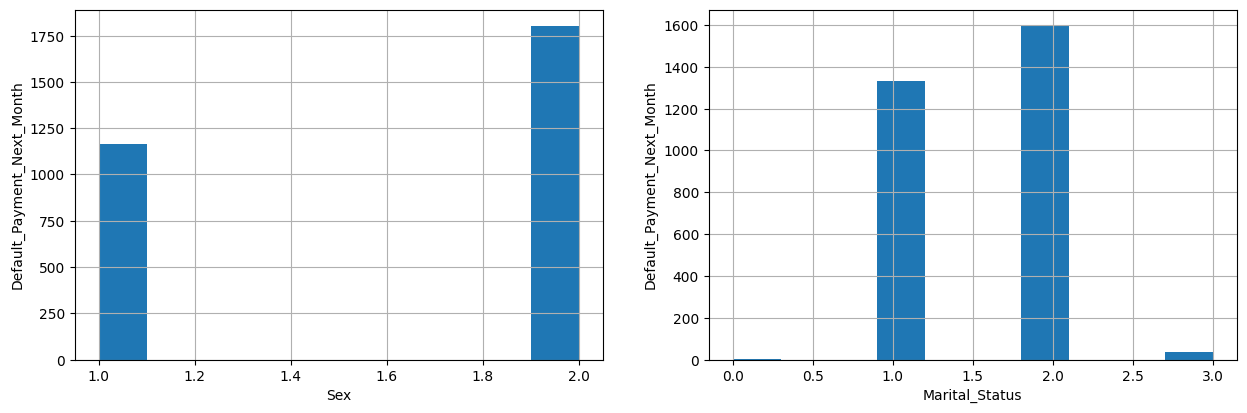

In [16]:
#Melihat distribusi data Limit_Balance dengan Age terhadap target data
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Sex.hist(bins=10)
fig.set_xlabel('Sex')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 2, 2)
fig = df.Marital_Status.hist(bins=10)
fig.set_xlabel('Marital_Status')
fig.set_ylabel('Default_Payment_Next_Month')

In [17]:
#Mengelompokan data Bill_Amt agar lebih mudah dilihat
bill_amt_group = df.groupby(['bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4','bill_amt_5','bill_amt_6']).size().reset_index(name='Total')
bill_amt_group.describe()

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,Total
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,53875.949442,52356.972455,49866.087517,45575.923640,42336.337866,41113.318689,1.033473
std,72896.908462,71350.152733,68702.748714,62407.104858,58755.730698,57791.456582,1.571545
min,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,1.000000
25%,5414.000000,4824.250000,4610.500000,3548.000000,2756.750000,2141.750000,1.000000
50%,26290.000000,25086.500000,23872.500000,20773.000000,19511.000000,19190.500000,1.000000
75%,71893.000000,69582.000000,65434.500000,61458.000000,55753.750000,54873.750000,1.000000
max,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,85.000000


Text(0, 0.5, 'Default_Payment_Next_Month')

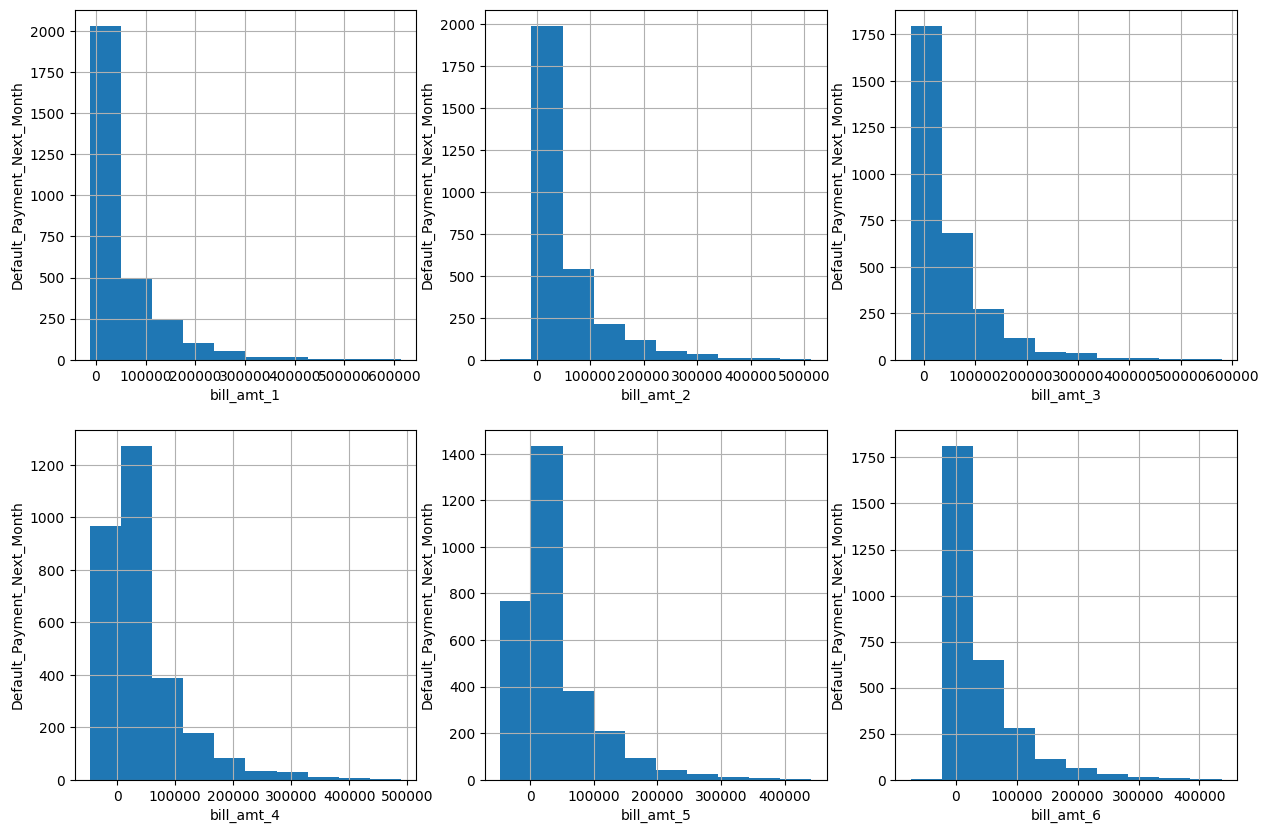

In [18]:
#Melihat distribusi data Bill_Amt_Group terhadap target data
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.bill_amt_1.hist(bins=10)
fig.set_xlabel('bill_amt_1')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 2)
fig = df.bill_amt_2.hist(bins=10)
fig.set_xlabel('bill_amt_2')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 3)
fig = df.bill_amt_3.hist(bins=10)
fig.set_xlabel('bill_amt_3')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 4)
fig = df.bill_amt_4.hist(bins=10)
fig.set_xlabel('bill_amt_4')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 5)
fig = df.bill_amt_5.hist(bins=10)
fig.set_xlabel('bill_amt_5')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 6)
fig = df.bill_amt_6.hist(bins=10)
fig.set_xlabel('bill_amt_6')
fig.set_ylabel('Default_Payment_Next_Month')

In [19]:
#Mengelompokan data pay_amt agar lebih mudah dilihat
pay_amt_group = df.groupby(['pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4','pay_amt_5','pay_amt_6']).size().reset_index(name='Total')
pay_amt_group.describe()

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Total
count,2813.000000,2.813000e+03,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,6680.531461,6.606393e+03,5423.836474,4803.408461,5174.334518,5669.114113,1.053679
std,21391.802964,2.961309e+04,14618.093632,13593.486424,17141.711970,17691.337126,2.490729
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1269.000000,1.164000e+03,700.000000,500.000000,500.000000,400.000000,1.000000
50%,2500.000000,2.487000e+03,2000.000000,1882.000000,1994.000000,1905.000000,1.000000
75%,5500.000000,5.200000e+03,4835.000000,4261.000000,4307.000000,4380.000000,1.000000
max,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,133.000000


Text(0, 0.5, 'Default_Payment_Next_Month')

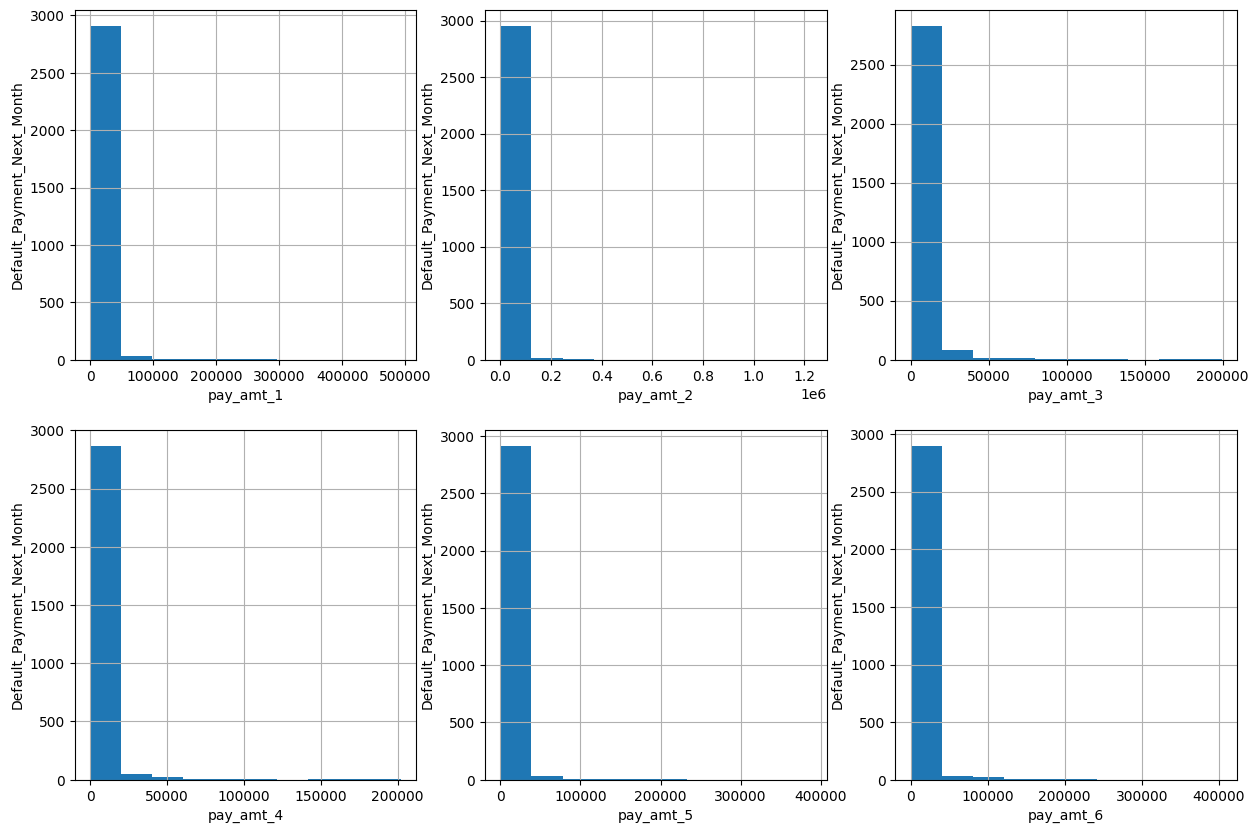

In [20]:
#Melihat distribusi data Pay_Amt_Group terhadap target data
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.pay_amt_1.hist(bins=10)
fig.set_xlabel('pay_amt_1')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 2)
fig = df.pay_amt_2.hist(bins=10)
fig.set_xlabel('pay_amt_2')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 3)
fig = df.pay_amt_3.hist(bins=10)
fig.set_xlabel('pay_amt_3')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 4)
fig = df.pay_amt_4.hist(bins=10)
fig.set_xlabel('pay_amt_4')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 5)
fig = df.pay_amt_5.hist(bins=10)
fig.set_xlabel('pay_amt_5')
fig.set_ylabel('Default_Payment_Next_Month')


plt.subplot(2, 3, 6)
fig = df.pay_amt_6.hist(bins=10)
fig.set_xlabel('pay_amt_6')
fig.set_ylabel('Default_Payment_Next_Month')

Terlihat bahwa data Sex, Marital_Status, bill_amt_group dan pay_amt_group tidak terdistribusi normal dan bisa berpengaruh terhadap model sehingga perlu ditangani.

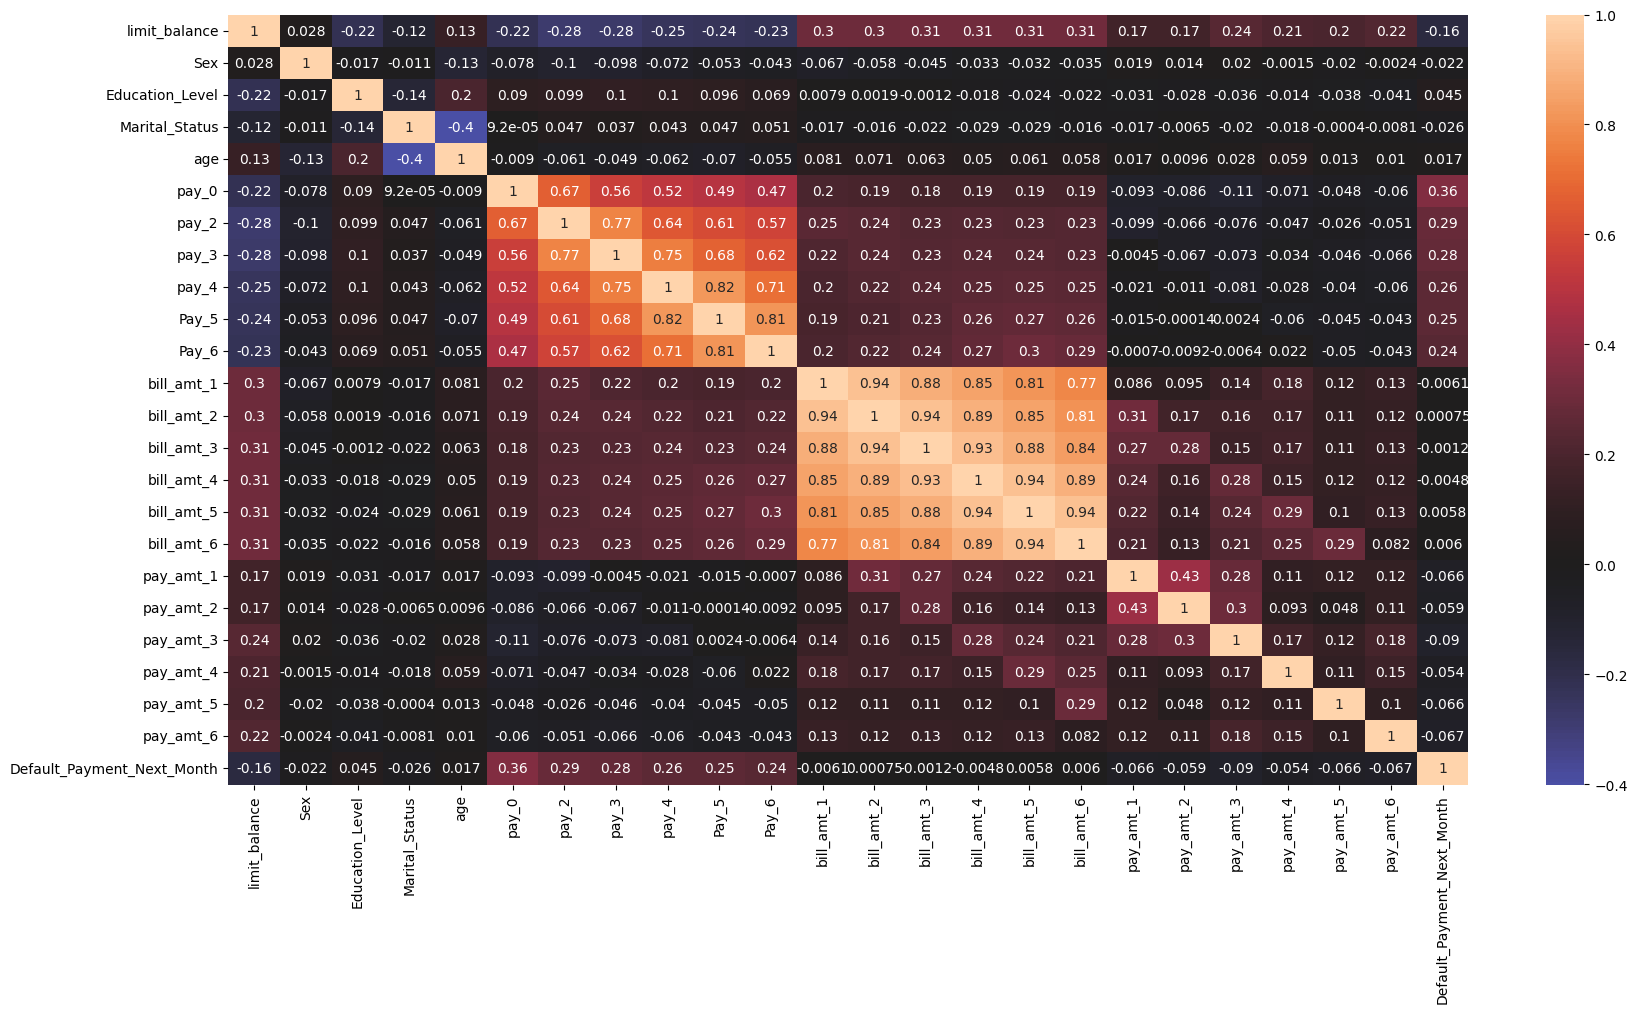

In [21]:
#Melihat korelasi data
df_corr= df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot= True, center=0)
plt.show()

Plot heatmap menunjukan korelasi antar data. Untuk melihat seberapa kuat korelasi data Default_Payment_Next_Month dengan variabel lain, terlihat pada parameter di sampingnya. Semakin mendekati 1 maka data tersebut korelasinya dengan Default_Payment_Next_Month termasuk sangat kuat. Apabila lebih dekat dengan 0 atau bahkan dibawah 0, maka korelasinya sangat jauh dari Default_Payment_Next_Month.

Dari plot diatas bisa dilihat bahwa semua data tidak memiliki korelasi yang kuat dengan data Default_Payment_Next_Month, yang nantinya akan menjadi target pada pemodelan ini.

##Feature Engineering

In [135]:
#Memisahkan data untuk Model Inference
df_inf = df.sample(10, random_state = 7)
df_inf

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
1324,120000.0,2,3,2,32.0,-1.0,0.0,0.0,0.0,0.0,...,71446.0,79589.0,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0
2825,210000.0,2,1,2,25.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2655,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
1675,50000.0,2,2,2,27.0,0.0,0.0,0.0,0.0,0.0,...,33760.0,0.0,0.0,1500.0,3000.0,4000.0,0.0,0.0,0.0,0
280,230000.0,2,1,1,34.0,0.0,0.0,0.0,0.0,0.0,...,100554.0,103929.0,107780.0,10001.0,5000.0,4500.0,5000.0,6500.0,4300.0,0
2217,170000.0,1,1,2,29.0,-1.0,2.0,-1.0,2.0,-1.0,...,12769.0,6283.0,3093.0,70.0,19136.0,64.0,6314.0,3107.0,3494.0,0
1315,260000.0,1,3,1,36.0,-1.0,0.0,0.0,0.0,0.0,...,73658.0,70273.0,67100.0,7425.0,2795.0,2779.0,2947.0,3400.0,5000.0,0
1543,260000.0,2,1,2,27.0,-1.0,-1.0,-1.0,0.0,0.0,...,17445.0,1795.0,278.0,1305.0,2690.0,15650.0,0.0,278.0,2500.0,0
2160,140000.0,1,5,2,30.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,1769.0,84042.0,89381.0,1823.0,1823.0,1769.0,85096.0,9000.0,4000.0,0
767,240000.0,2,2,2,41.0,0.0,0.0,0.0,0.0,0.0,...,190434.0,179424.0,183299.0,7106.0,12014.0,6075.0,5900.0,5900.0,5500.0,0


In [136]:
#Memisahkan Data Inference dari dataset
df_train_test = df.drop(df_inf.index)
df_train_test

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [24]:
#Menentukan fitur dan target
X = df_train_test.drop(['Default_Payment_Next_Month'], axis=1)
y = df_train_test['Default_Payment_Next_Month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7, stratify=y)

In [25]:
#Melihat hasil inference dan data split
print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', df_inf.shape)

Train Set shape :  (2363, 23)
Test Set shape :  (591, 23)
Inference Set shape :  (10, 24)


###Menangani outliers

In [26]:
#Mencari Outlier pada data Limit_Balance dan Age
IQR = X_train.Sex.quantile(0.75) - X_train.Sex.quantile(0.25)
Lower_fence = X_train.Sex.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.Sex.quantile(0.75) + (IQR * 3)
print('Sex mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.Marital_Status.quantile(0.75) - X_train.Marital_Status.quantile(0.25)
Lower_fence = X_train.Marital_Status.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.Marital_Status.quantile(0.75) + (IQR * 3)
print('Marital_Status mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Sex mempunyai outliers < -2.0 dan > 5.0
Marital_Status mempunyai outliers < -2.0 dan > 5.0


In [27]:
#Mencari Outlier pada data bill_amt_group
IQR = X_train.bill_amt_1.quantile(0.75) - X_train.bill_amt_1.quantile(0.25)
Lower_fence = X_train.bill_amt_1.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.bill_amt_1.quantile(0.75) + (IQR * 3)
print('bill_amt_1 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.bill_amt_2.quantile(0.75) - X_train.bill_amt_2.quantile(0.25)
Lower_fence = X_train.bill_amt_2.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.bill_amt_2.quantile(0.75) + (IQR * 3)
print('bill_amt_2 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.bill_amt_3.quantile(0.75) - X_train.bill_amt_3.quantile(0.25)
Lower_fence = X_train.bill_amt_3.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.bill_amt_3.quantile(0.75) + (IQR * 3)
print('bill_amt_3 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.bill_amt_4.quantile(0.75) - X_train.bill_amt_4.quantile(0.25)
Lower_fence = X_train.bill_amt_4.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.bill_amt_4.quantile(0.75) + (IQR * 3)
print('bill_amt_4 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.bill_amt_5.quantile(0.75) - X_train.bill_amt_5.quantile(0.25)
Lower_fence = X_train.bill_amt_5.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.bill_amt_5.quantile(0.75) + (IQR * 3)
print('bill_amt_5 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.bill_amt_6.quantile(0.75) - X_train.bill_amt_6.quantile(0.25)
Lower_fence = X_train.bill_amt_6.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.bill_amt_6.quantile(0.75) + (IQR * 3)
print('bill_amt_6 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

bill_amt_1 mempunyai outliers < -192510.5 dan > 265625.5
bill_amt_2 mempunyai outliers < -187714.5 dan > 258217.0
bill_amt_3 mempunyai outliers < -175301.0 dan > 240863.0
bill_amt_4 mempunyai outliers < -163623.5 dan > 223994.5
bill_amt_5 mempunyai outliers < -147570.0 dan > 200708.0
bill_amt_6 mempunyai outliers < -148447.0 dan > 201112.0


In [28]:
#Mencari Outlier pada data pay_amt_group

IQR = X_train.pay_amt_1.quantile(0.75) - X_train.pay_amt_1.quantile(0.25)
Lower_fence = X_train.pay_amt_1.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.pay_amt_1.quantile(0.75) + (IQR * 3)
print('pay_amt_1 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.pay_amt_2.quantile(0.75) - X_train.pay_amt_2.quantile(0.25)
Lower_fence = X_train.pay_amt_2.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.pay_amt_2.quantile(0.75) + (IQR * 3)
print('pay_amt_2 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.pay_amt_3.quantile(0.75) - X_train.pay_amt_3.quantile(0.25)
Lower_fence = X_train.pay_amt_3.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.pay_amt_3.quantile(0.75) + (IQR * 3)
print('pay_amt_3 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.pay_amt_4.quantile(0.75) - X_train.pay_amt_4.quantile(0.25)
Lower_fence = X_train.pay_amt_4.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.pay_amt_4.quantile(0.75) + (IQR * 3)
print('pay_amt_4 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.pay_amt_5.quantile(0.75) - X_train.pay_amt_5.quantile(0.25)
Lower_fence = X_train.pay_amt_5.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.pay_amt_5.quantile(0.75) + (IQR * 3)
print('pay_amt_5 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = X_train.pay_amt_6.quantile(0.75) - X_train.pay_amt_6.quantile(0.25)
Lower_fence = X_train.pay_amt_6.quantile(0.25) - (IQR * 3)
Upper_fence = X_train.pay_amt_6.quantile(0.75) + (IQR * 3)
print('pay_amt_6 mempunyai outliers < {lowerboundary} dan > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


pay_amt_1 mempunyai outliers < -11180.0 dan > 17261.0
pay_amt_2 mempunyai outliers < -11818.0 dan > 17613.5
pay_amt_3 mempunyai outliers < -11373.5 dan > 16276.5
pay_amt_4 mempunyai outliers < -10850.0 dan > 15137.5
pay_amt_5 mempunyai outliers < -10800.0 dan > 15100.0
pay_amt_6 mempunyai outliers < -11816.0 dan > 15862.0


In [29]:
#Menangani outliers
def max_value(df1, variable, top):
    return np.where(df1[variable]>top, top, df1[variable])

for df1 in [X_train, X_test]:
    df1['Sex'] = max_value(df1, 'Sex', 5.0)
    df1['Marital_Status'] = max_value(df1, 'Marital_Status', 5.0)

    df1['bill_amt_1'] = max_value(df1, 'bill_amt_1', 265625.5)
    df1['bill_amt_2'] = max_value(df1, 'bill_amt_2', 258217.0)
    df1['bill_amt_3'] = max_value(df1, 'bill_amt_3', 240863.0)
    df1['bill_amt_4'] = max_value(df1, 'bill_amt_4', 223994.5)
    df1['bill_amt_5'] = max_value(df1, 'bill_amt_5', 200708.0)
    df1['bill_amt_6'] = max_value(df1, 'bill_amt_6', 201112.0)

    df1['pay_amt_1'] = max_value(df1, 'pay_amt_1', 17261.0)
    df1['pay_amt_2'] = max_value(df1, 'pay_amt_2', 17613.5)
    df1['pay_amt_3'] = max_value(df1, 'pay_amt_3', 16276.5)
    df1['pay_amt_4'] = max_value(df1, 'pay_amt_4', 15137.5)
    df1['pay_amt_5'] = max_value(df1, 'pay_amt_5', 15100.0)
    df1['pay_amt_6'] = max_value(df1, 'pay_amt_6', 15862.0)

In [30]:
print('Sex setelah di capping :' , (X_train.Sex.max(), X_test.Sex.max()))
print('Marital_Status setelah di capping :' , (X_train.Marital_Status.max(), X_test.Marital_Status.max()))

Sex setelah di capping : (2.0, 2.0)
Marital_Status setelah di capping : (3.0, 3.0)


In [31]:
print('bill_amt_1 setelah di capping :' , (X_train.bill_amt_1.max(), X_test.bill_amt_1.max()))
print('bill_amt_2 setelah di capping :' , (X_train.bill_amt_2.max(), X_test.bill_amt_2.max()))
print('bill_amt_3 setelah di capping :' , (X_train.bill_amt_3.max(), X_test.bill_amt_3.max()))
print('bill_amt_4 setelah di capping :' , (X_train.bill_amt_4.max(), X_test.bill_amt_4.max()))
print('bill_amt_5 setelah di capping :' , (X_train.bill_amt_5.max(), X_test.bill_amt_5.max()))
print('bill_amt_6 setelah di capping :' , (X_train.bill_amt_6.max(), X_test.bill_amt_6.max()))

bill_amt_1 setelah di capping : (265625.5, 265625.5)
bill_amt_2 setelah di capping : (258217.0, 258217.0)
bill_amt_3 setelah di capping : (240863.0, 240863.0)
bill_amt_4 setelah di capping : (223994.5, 223994.5)
bill_amt_5 setelah di capping : (200708.0, 200708.0)
bill_amt_6 setelah di capping : (201112.0, 201112.0)


In [32]:
print('pay_amt_1 setelah di capping :' , (X_train.pay_amt_1.max(), X_test.pay_amt_1.max()))
print('pay_amt_2 setelah di capping :' , (X_train.pay_amt_2.max(), X_test.pay_amt_2.max()))
print('pay_amt_3 setelah di capping :' , (X_train.pay_amt_3.max(), X_test.pay_amt_3.max()))
print('pay_amt_4 setelah di capping :' , (X_train.pay_amt_4.max(), X_test.pay_amt_4.max()))
print('pay_amt_5 setelah di capping :' , (X_train.pay_amt_5.max(), X_test.pay_amt_5.max()))
print('pay_amt_6 setelah di capping :' , (X_train.pay_amt_6.max(), X_test.pay_amt_6.max()))

pay_amt_1 setelah di capping : (17261.0, 17261.0)
pay_amt_2 setelah di capping : (17613.5, 17613.5)
pay_amt_3 setelah di capping : (16276.5, 16276.5)
pay_amt_4 setelah di capping : (15137.5, 15137.5)
pay_amt_5 setelah di capping : (15100.0, 15100.0)
pay_amt_6 setelah di capping : (15862.0, 15862.0)


In [33]:
#Memeriksa variable numerical
numericals = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numericals

['limit_balance',
 'Sex',
 'Education_Level',
 'Marital_Status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'Pay_5',
 'Pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

In [34]:
X_train[numericals].describe().round(2)

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,...,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00
mean,164701.65,1.60,1.85,1.56,35.28,0.01,-0.13,-0.14,-0.20,-0.23,...,45893.97,42109.27,38685.58,37797.69,4045.81,3891.46,3449.28,2989.23,3045.16,3179.08
std,125901.77,0.49,0.77,0.52,9.11,1.12,1.18,1.19,1.17,1.16,...,59443.07,54952.55,51202.87,50647.73,4653.32,4662.66,4389.07,3848.18,3948.72,4276.14
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-25443.00,-46627.00,-46627.00,-73895.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,3055.00,2498.50,1692.00,1364.00,1009.00,795.50,476.50,287.50,300.00,46.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,21128.00,19602.00,18458.00,18381.00,2200.00,2071.00,1983.00,1580.00,1559.00,1600.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,62507.00,57872.50,51446.00,51301.00,5072.00,5000.00,4426.50,4000.00,4000.00,4000.00
max,800000.00,2.00,6.00,3.00,69.00,8.00,7.00,7.00,7.00,7.00,...,240863.00,223994.50,200708.00,201112.00,17261.00,17613.50,16276.50,15137.50,15100.00,15862.00


In [35]:
num_columns = X_train.select_dtypes(include='number').columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'Sex', 'Education_Level', 'Marital_Status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'Pay_5', 'Pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


##Feature Selection
Karena semua data berupa data numerical, maka semua fitur akan berupa numerical.

In [36]:
#Encoding
enc= OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(X_train)

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [37]:
X_enc_train=enc.transform(X_train)
X_enc_test=enc.transform(X_test)
X_enc_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [38]:
#Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_num_scaled = scaler.transform(X_train)
X_test_num_scaled = scaler.transform(X_test)
X_train_num_scaled

array([[-0.75234603,  0.80845774,  0.19375175, ...,  2.28748067,
        -0.6624216 , -0.64466282],
       [ 0.12153592,  0.80845774,  0.19375175, ..., -0.49104641,
         3.05349408, -0.74360484],
       [-0.11679552,  0.80845774,  1.49812607, ..., -0.77695659,
        -0.77134074, -0.74360484],
       ...,
       [-0.91123366,  0.80845774,  0.19375175, ..., -0.69742158,
        -0.6588754 ,  1.75590919],
       [ 0.91597406,  0.80845774, -1.11062257, ...,  1.04247181,
        -0.77134074, -0.00773818],
       [-1.1495651 , -1.23692303,  0.19375175, ..., -0.2571199 ,
         0.49516085,  0.42592259]])

##Model Definition

In [39]:
#Model Logistic Regression
log_model = LogisticRegression(random_state=7)
log_model.fit(X_enc_train,y_train)

LogisticRegression(random_state=7)

In [40]:
#Model Decission Tree
DTmodel = DecisionTreeClassifier(random_state=7)
DTmodel.fit(X_enc_train,y_train)

DecisionTreeClassifier(random_state=7)

In [41]:
#Model Random Forest
RFmodel = RandomForestClassifier(random_state=7)
RFmodel.fit(X_enc_train,y_train)

RandomForestClassifier(random_state=7)

In [42]:
#Model SVM
SVMmodel = SVC(gamma="scale", random_state=7)
SVMmodel.fit(X_enc_train,y_train)

SVC(random_state=7)

In [43]:
#Model KNN
KNNmodel = KNeighborsClassifier(n_neighbors = 3)
KNNmodel.fit(X_enc_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
#Model Naive Bayes
NBmodel = GaussianNB()
NBmodel.fit(X_enc_train, y_train)

GaussianNB()

In [45]:
#AdaBoost
Adamodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
Adamodel.fit(X_enc_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

##Model Training

In [46]:
#Logistic Regression
y_pred_train_LR = log_model.predict(X_enc_train)
y_pred_test_LR = log_model.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_LR))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_LR))

accuracy score train :  0.988573846804909
accuracy score test :  0.8324873096446701


In [47]:
#Decission Tree
y_pred_train_DT = DTmodel.predict(X_enc_train)
y_pred_test_DT = DTmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_DT))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_DT))

accuracy score train :  1.0
accuracy score test :  0.7851099830795262


In [48]:
#Random Forest
y_pred_train_RF = RFmodel.predict(X_enc_train)
y_pred_test_RF = RFmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RF))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RF))

accuracy score train :  1.0
accuracy score test :  0.817258883248731


In [49]:
#SVM
y_pred_train_SVM = SVMmodel.predict(X_enc_train)
y_pred_test_SVM = SVMmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_SVM))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_SVM))

accuracy score train :  0.8984341938214134
accuracy score test :  0.8460236886632826


In [50]:
#KNN
y_pred_train_KNN = KNNmodel.predict(X_enc_train)
y_pred_test_KNN = KNNmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_KNN))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_KNN))

accuracy score train :  0.8675412611087601
accuracy score test :  0.7631133671742809


In [51]:
#Naive Bayes
y_pred_train_NB = NBmodel.predict(X_enc_train)
y_pred_test_NB = NBmodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_NB))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_NB))

accuracy score train :  0.9754549301735083
accuracy score test :  0.4517766497461929


In [52]:
#Adaboost
y_pred_train_Ada = Adamodel.predict(X_enc_train)
y_pred_test_Ada = Adamodel.predict(X_enc_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_Ada))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_Ada))

accuracy score train :  1.0
accuracy score test :  0.7935702199661591


Semua model tergolong overfitting karena nilai train set lebih tinggi daripada nilai test set yang berarti lebih sedikit eror pada train set dibanding test set dan berarti memiliki variance yang tinggi.

###Memeriksa cross validation

In [53]:
cvsLR= cross_val_score(log_model, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Logistic Regression:{}'.format(cvsLR))

Cross-validation Logistic Regression:[0.78299492 0.7893401  0.78653113]


In [54]:
print('Rata-rata cross-validation Logistic Regression: {:.4f}'.format(cvsLR.mean()))
print('Standard Deviation Logistic Regression: {:.4f}'.format(cvsLR.std()))

Rata-rata cross-validation Logistic Regression: 0.7863
Standard Deviation Logistic Regression: 0.0026


In [55]:
cvsDT= cross_val_score(DTmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Decision Tree:{}'.format(cvsDT))

Cross-validation Decision Tree:[0.7322335  0.72208122 0.72935197]


In [56]:
print('Rata-rata cross-validation Decision Tree: {:.4f}'.format(cvsDT.mean()))
print('Standard Deviation Decision Tree: {:.4f}'.format(cvsDT.std()))

Rata-rata cross-validation Decision Tree: 0.7279
Standard Deviation Decision Tree: 0.0043


In [57]:
cvsRF= cross_val_score(RFmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Random Forest:{}'.format(cvsRF))

Cross-validation Random Forest:[0.81725888 0.82233503 0.81575604]


In [58]:
print('Rata-rata cross-validation Random Forest: {:.4f}'.format(cvsRF.mean()))
print('Standard Deviation Random Forest: {:.4f}'.format(cvsRF.std()))

Rata-rata cross-validation Random Forest: 0.8184
Standard Deviation Random Forest: 0.0028


In [59]:
cvsSVM= cross_val_score(SVMmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation SVM:{}'.format(cvsSVM))

Cross-validation SVM:[0.78553299 0.78553299 0.78526048]


In [60]:
print('Rata-rata cross-validation SVM: {:.4f}'.format(cvsSVM.mean()))
print('Standard Deviation SVM: {:.4f}'.format(cvsSVM.std()))

Rata-rata cross-validation SVM: 0.7854
Standard Deviation SVM: 0.0001


In [61]:
cvsKNN= cross_val_score(KNNmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation KNN:{}'.format(cvsKNN))

Cross-validation KNN:[0.73350254 0.72969543 0.77636595]


In [62]:
print('Rata-rata cross-validation KNN: {:.4f}'.format(cvsKNN.mean()))
print('Standard Deviation KNN: {:.4f}'.format(cvsKNN.std()))

Rata-rata cross-validation KNN: 0.7465
Standard Deviation KNN: 0.0212


In [63]:
cvsNB= cross_val_score(NBmodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Naive Baiyes:{}'.format(cvsNB))

Cross-validation Naive Baiyes:[0.55837563 0.55964467 0.58958069]


In [64]:
print('Rata-rata cross-validation Naive Bayes: {:.4f}'.format(cvsNB.mean()))
print('Standard Deviation Naive Bayes: {:.4f}'.format(cvsNB.std()))

Rata-rata cross-validation Naive Bayes: 0.5692
Standard Deviation Naive Bayes: 0.0144


In [65]:
cvsAda= cross_val_score(Adamodel, X_train, y_train, cv = 3, scoring='accuracy')
print('Cross-validation Adaboost:{}'.format(cvsAda))

Cross-validation Adaboost:[0.7322335  0.7284264  0.71283355]


In [66]:
print('Rata-rata cross-validation Adaboost: {:.4f}'.format(cvsAda.mean()))
print('Standard Deviation Adaboost: {:.4f}'.format(cvsAda.std()))

Rata-rata cross-validation Adaboost: 0.7245
Standard Deviation Adaboost: 0.0084


Dari hasil Cross-Validation diatas, terlihat bahwa model terbaik adalah Adaboost dengan rata-rata cross-validation tertinggi yaitu 0.8197. Model Random Forest mempunyai nilai rata-rata cross-validation tertinggi kedua yaitu 0.8184 dan model Logistic Regression dengan nilai Standard Deviation terkecil kedua yaitu 0.0026.

Ketiga model ini akan dipilih untuk dilakukan hyper parameter tuning untuk mencari model terbaik dari antara ketiganya.

###Hyperparameter tuning

In [67]:
#Pada Logistic Regression
parametersLR = {
    'C': [0.001, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_LR = GridSearchCV(estimator = log_model,
                           param_grid = parametersLR,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)
grid_LR.fit(X_train, y_train)

best_params_LR = grid_LR.best_params_
best_pipe_LR = grid_LR.best_estimator_
df_result_LR = pd.DataFrame.from_dict(grid_LR.cv_results_, orient='columns')

In [98]:
#Nilai terbaik dari GridSearchCV
print('Nilai terbaik GridSearch CV Logistic Regression: {:.4f}\n\n'.format(grid_LR.best_score_))

#Mencari parameter terbaik
print('Parameter terbaik :','\n\n', (grid_LR.best_params_))

#Estimator terbaik dari GridSearch
print('\n\nEstimator terbaik :','\n\n', (grid_LR.best_estimator_))

Nilai terbaik GridSearch CV Logistic Regression: 0.8256


Parameter terbaik : 

 {'C': 1000, 'solver': 'newton-cg'}


Estimator terbaik : 

 LogisticRegression(C=1000, random_state=7, solver='newton-cg')


Hyper parameter yang terbaik dari model Logistic Regression adalah
*   C : 1000
*   Solver : newton-cg

In [71]:
#Random Forest

max_features = ['auto', 'sqrt', 'log2']


parametersRF= {'max_features':max_features,
               'criterion':['entropy','gini']}

grid_RF = GridSearchCV(estimator = RFmodel,
                           param_grid = parametersRF,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)
grid_RF.fit(X_train, y_train)

best_params_RF = grid_RF.best_params_
best_pipe_RF = grid_RF.best_estimator_
df_result_RF = pd.DataFrame.from_dict(grid_RF.cv_results_, orient='columns')

In [100]:
#Nilai terbaik dari GridSearchCV
print('Nilai terbaik GridSearch CV Random Forest: {:.4f}\n\n'.format(grid_RF.best_score_))

#Mencari parameter terbaik
print('Parameter terbaik :','\n\n', (grid_RF.best_params_))

#Estimator terbaik dari GridSearch
print('\n\nEstimator terbaik :','\n\n', (grid_RF.best_estimator_))

Nilai terbaik GridSearch CV Random Forest: 0.8214


Parameter terbaik : 

 {'criterion': 'entropy', 'max_features': 'auto'}


Estimator terbaik : 

 RandomForestClassifier(criterion='entropy', max_features='auto', random_state=7)


Hyper parameter yang terbaik dari model Random Forest adalah
*   criterion : entropy
*   max_features : auto

In [73]:
#Adaboost
parametersAda = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'learning_rate':[0.01,0.1]}

grid_Ada = GridSearchCV(estimator = Adamodel,
                        param_grid = parametersAda,
                        verbose=1,
                        scoring='accuracy',
                        n_jobs=-1)
grid_Ada.fit(X_train, y_train)

best_params_Ada = grid_Ada.best_params_
best_pipe_Ada = grid_Ada.best_estimator_
df_result_Ada = pd.DataFrame.from_dict(grid_Ada.cv_results_, orient='columns')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [101]:
#Nilai terbaik dari GridSearchCV
print('Nilai terbaik GridSearch CV Adaboost: {:.4f}\n\n'.format(grid_Ada.best_score_))

#Mencari parameter terbaik
print('Parameter terbaik :','\n\n', (grid_Ada.best_params_))

#Estimator terbaik dari GridSearch
print('\n\nEstimator terbaik :','\n\n', (grid_Ada.best_estimator_))

Nilai terbaik GridSearch CV Adaboost: 0.8328


Parameter terbaik : 

 {'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1}


Estimator terbaik : 

 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.1)


Hyper parameter yang terbaik dari model Adaboost adalah
*   base_estimator__max_depth: 2
*   base_estimator__min_samples_leaf: 5
*   learning_rate : 0.1




##Model Evaluation

In [89]:
#Logistic Regression
print('Hasil Train')
print(classification_report(y_train,y_pred_train_LR))
print('Hasil Test')
print(classification_report(y_test,y_pred_test_LR))

Hasil Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1856
           1       1.00      0.95      0.97       507

    accuracy                           0.99      2363
   macro avg       0.99      0.97      0.98      2363
weighted avg       0.99      0.99      0.99      2363

Hasil Test
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       464
           1       0.68      0.42      0.52       127

    accuracy                           0.83       591
   macro avg       0.77      0.68      0.71       591
weighted avg       0.82      0.83      0.82       591



In [102]:
print('Hasil Train')
print(roc_auc_score(y_train,y_pred_train_LR))
print('Hasil Test')
print(roc_auc_score(y_test,y_pred_test_LR))

Hasil Train
0.9740895778072503
Hasil Test
0.6817217621504208


Bila melihat nilai f-1 pada kelas 1 masing-masing hasil, maka bisa dikatakan bahwa model Logistic Regression bersifat overfitting. Dan bila melihat nilai ROC-AUC, model juga bisa dikatakan overfitting.

In [91]:
#Random Forest
print('Hasil Train')
print(classification_report(y_train,y_pred_train_RF))
print('Hasil Test')
print(classification_report(y_test,y_pred_test_RF))

Hasil Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1856
           1       1.00      1.00      1.00       507

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

Hasil Test
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       464
           1       0.70      0.26      0.38       127

    accuracy                           0.82       591
   macro avg       0.76      0.61      0.64       591
weighted avg       0.80      0.82      0.78       591



In [103]:
print('Hasil Train')
print(roc_auc_score(y_train,y_pred_train_RF))
print('Hasil Test')
print(roc_auc_score(y_test,y_pred_test_RF))

Hasil Train
1.0
Hasil Test
0.614835052945968


Bila melihat nilai f-1 pada kelas 1 masing-masing hasil, maka bisa dikatakan bahwa model Random Forest bersifat overfitting. Dan bila melihat nilai ROC-AUC, model juga bisa dikatakan overfitting.

In [93]:
#Adaboost
print('Hasil Train')
print(classification_report(y_train,y_pred_train_Ada))
print('Hasil Test')
print(classification_report(y_test,y_pred_test_Ada))

Hasil Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1856
           1       1.00      1.00      1.00       507

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

Hasil Test
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       464
           1       0.52      0.45      0.48       127

    accuracy                           0.79       591
   macro avg       0.69      0.67      0.68       591
weighted avg       0.78      0.79      0.79       591



In [104]:
print('Hasil Train')
print(roc_auc_score(y_train,y_pred_train_Ada))
print('Hasil Test')
print(roc_auc_score(y_test,y_pred_test_Ada))

Hasil Train
1.0
Hasil Test
0.668374966060277


Bila melihat nilai f-1 pada kelas 1 masing-masing hasil, maka bisa dikatakan bahwa model Adaboost juga bersifat overfitting. Dan bila melihat nilai ROC-AUC, model juga bisa dikatakan overfitting.

###Kesimpulan Akhir
Ketiga model tersebut bisa dikatakan semua overfitting, namun masing-masing bisa memprediksi dengan baik di kelas 0. Hal ini bisa terjadi karena dataset bersifat imbalance.

##Model Saving

In [83]:
#Saving model sebelum inference

with open('log_model.pkl','wb') as file_1:
    joblib.dump(log_model, file_1)

with open('DTmodel.pkl','wb') as file_2:
    joblib.dump(DTmodel, file_2)

with open('RFmodel.pkl','wb') as file_3:
    joblib.dump(RFmodel, file_3)

with open('SVMmodel.pkl','wb') as file_4:
    joblib.dump(SVMmodel, file_4)

with open('KNNmodel.pkl','wb') as file_5:
    joblib.dump(KNNmodel, file_5)

with open('NBmodel.pkl','wb') as file_6:
    joblib.dump(NBmodel, file_6)

with open('Adamodel.pkl','wb') as file_7:
    joblib.dump(Adamodel, file_7)

with open('model_scaler.pkl', 'wb') as file_8:
     joblib.dump(scaler, file_8)

with open('model_enc.pkl', 'wb') as file_9:
     joblib.dump(enc, file_9)

with open('list_num_cols.txt', 'w') as file_10:
     json.dump(num_columns, file_10)

##Model Inference

In [84]:
#Load model untuk digunakan ke data inference
with open('log_model.pkl','rb') as file_1:
    log_model = joblib.load(file_1)

with open('DTmodel.pkl','rb') as file_2:
    DTmodel = joblib.load(file_2)

with open('RFmodel.pkl','rb') as file_3:
    RFmodel = joblib.load(file_3)

with open('SVMmodel.pkl','rb') as file_4:
    SVMmodel = joblib.load(file_4)

with open('KNNmodel.pkl','rb') as file_5:
    KNNmodel = joblib.load(file_5)

with open('NBmodel.pkl','rb') as file_6:
    NBmodel = joblib.load(file_6)

with open('Adamodel.pkl','rb') as file_7:
    Adamodel = joblib.load(file_7)

with open('model_scaler.pkl','rb') as file_8:
    scaler = joblib.load(file_8)

with open('model_enc.pkl','rb') as file_9:
    enc = joblib.load(file_9)

with open('list_num_cols.txt','r') as file_10:
    list_num_cols = json.load(file_10)

In [152]:
#Melihat data inference
df_inf

,limit_balance,Sex,Education_Level,Marital_Status,age,pay_0,pay_2,pay_3,pay_4,Pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,Default_Payment_Next_Month
1324,120000.0,2,3,2,32.0,-1.0,0.0,0.0,0.0,0.0,...,71446.0,79589.0,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0
2825,210000.0,2,1,2,25.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2655,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
1675,50000.0,2,2,2,27.0,0.0,0.0,0.0,0.0,0.0,...,33760.0,0.0,0.0,1500.0,3000.0,4000.0,0.0,0.0,0.0,0
280,230000.0,2,1,1,34.0,0.0,0.0,0.0,0.0,0.0,...,100554.0,103929.0,107780.0,10001.0,5000.0,4500.0,5000.0,6500.0,4300.0,0
2217,170000.0,1,1,2,29.0,-1.0,2.0,-1.0,2.0,-1.0,...,12769.0,6283.0,3093.0,70.0,19136.0,64.0,6314.0,3107.0,3494.0,0
1315,260000.0,1,3,1,36.0,-1.0,0.0,0.0,0.0,0.0,...,73658.0,70273.0,67100.0,7425.0,2795.0,2779.0,2947.0,3400.0,5000.0,0
1543,260000.0,2,1,2,27.0,-1.0,-1.0,-1.0,0.0,0.0,...,17445.0,1795.0,278.0,1305.0,2690.0,15650.0,0.0,278.0,2500.0,0
2160,140000.0,1,5,2,30.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,1769.0,84042.0,89381.0,1823.0,1823.0,1769.0,85096.0,9000.0,4000.0,0
767,240000.0,2,2,2,41.0,0.0,0.0,0.0,0.0,0.0,...,190434.0,179424.0,183299.0,7106.0,12014.0,6075.0,5900.0,5900.0,5500.0,0


In [176]:
# Splitting Dataset
X_inf = df_inf.drop(['Default_Payment_Next_Month'], axis=1)
X_inf = X_inf[num_columns]
y_inf = df_inf["Default_Payment_Next_Month"]

In [177]:
#Melihat hasil prediksi data inference
y_inf_pred = log_model.predict(y_inf)

ValueError: ignored

##Kesimpulan

1. Model Logistic Regression mempunyai kinerja yang paling baik diantara 3 model terbaik untuk memprediksi Default_Payment_Next_Month dengan mempunyai nilai test 0.68

2. Ketiga model tergolong overfitting karena nilai train lebih tinggi daripada nilai test.

3. Rata-rata cross validation semua model dibawah nilai dari model utama, maka bisa disimpulkan bahwa cross validation tidak memberikan model improvement.